1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use logistic model Regression. Try to apply different *solver* and *penalty* to find the best one.
5. Perform model on training set and test set
6. Measure performance of the model.
7. Which metric is your main metric and why? Which solver and penalty have you chosen? (<= 100 words)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

- Age: This is the attribute that describes the age of the patient. There is data type $int64$, the highest value is 29, and the lowest is 77.
- Sex: This is the attribute indicating the gender of the patient, where 0 indicates male patient, 1 female patient.
- ChestPainType: This is the attribute that indicates the patient's chest pain level. With levels 0, 1, 2, and 3.
- RestingBP: This is the attribute that indicates the patient's blood pressure with data type $int64$, the value is in the range [94, 200]
- Cholesterol: This attribute indicates the patient's cholesterol level as measured in the hospital. Has the data type $int64$, where the value is in [126, 564]
- FastingBS: This is an attribute that describes the patient's fasting blood sugar. In which, if the patient has more than 120mg/dl sugar = 1, otherwise = 0.
- RestingECG: This property displays the results of the ECG from 0 to 2 (0, 1, 2). Where each value indicates the severity of the pain.
- thalach: Patient's highest heart rate
- ExerciseAngina: Whether or not you have angina during exercise. Yes denotes 1, no denotes 0.
- Oldpeak: Attribute expressing the stress level of the patient. Has a value of type $float64$, the value is in [0, 6.2]
- ST\_Slope: Patient's condition during exercise. Includes [Upsloping, Flat, Down sloping] states that are sequentially digitized to [0, 1, 2].
- ca: number of major vessels (0-3) colored by flourosopy - given
- thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
- HeartDisease: Results of the patient's condition. 1 is for signs of heart disease, 0 is for no signs of heart disease.

<div align='left'><font size="6" color="#FFA500">[LAB 02] NMMH </font></div>

## Load Dataset

In [ ]:
import pandas as pd
import numpy as np

PATH = "heart.csv" # Path to your file

df = pd.read_csv(PATH)
#ToDo: Show histogram of dataframe

## Data Analysis

Thông tin chung về data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886 entries, 0 to 885
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       886 non-null    int64  
 1   sex       886 non-null    int64  
 2   cp        886 non-null    int64  
 3   trestbps  886 non-null    int64  
 4   chol      886 non-null    int64  
 5   fbs       886 non-null    int64  
 6   restecg   886 non-null    int64  
 7   thalach   886 non-null    int64  
 8   exang     886 non-null    int64  
 9   oldpeak   886 non-null    float64
 10  slope     886 non-null    int64  
 11  ca        886 non-null    int64  
 12  thal      886 non-null    int64  
 13  target    886 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.0 KB


In [102]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean    54.007901    0.683973    1.005643  132.117381  247.497743    0.168172   
std      9.126292    0.465186    1.024542   16.807511   47.209995    0.374230   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.000000    0.000000    0.000000  120.000000  212.000000    0.000000   
50%     54.000000    1.000000    1.000000  130.000000  245.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  274.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  886.000000  886.000000  886.000000  886.000000  886.000000  886.000000   
mean     0.495485  149.492099    0.310384    1.083296    1.424379    0.714447   
std      0.526669   23.9213

Ta đếm số giá trị duy nhất của các cột

In [103]:
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Attribute {col} has unique values:  ",end = "")
    if len(unique_values) > 10:
        print(f"{unique_values[:10]} ... and more")
    else:
        print(unique_values)
    print()

Attribute age has unique values:  [46 71 34 44 63 54 55 29 58 51] ... and more

Attribute sex has unique values:  [1 0]

Attribute cp has unique values:  [0 1 2 3]

Attribute trestbps has unique values:  [120 160 118 145 135 132 130 138 105 140] ... and more

Attribute chol has unique values:  [249 302 303 304 305 306 301 300 299 298] ... and more

Attribute fbs has unique values:  [0 1]

Attribute restecg has unique values:  [0 1 2]

Attribute thalach has unique values:  [144 162 163 164 165 166 161 160 159 158] ... and more

Attribute exang has unique values:  [0 1]

Attribute oldpeak has unique values:  [0.8 0.4 0.7 0.  2.3 1.2 0.3 0.6 1.5 1.3] ... and more

Attribute slope has unique values:  [2 0 1]

Attribute ca has unique values:  [0 2 1 3 4]

Attribute thal has unique values:  [3 2 1 0]

Attribute target has unique values:  [0 1]



Ngắn gọn hơn

In [104]:
print(df.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        203
fbs           2
restecg       3
thalach     120
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


Từ đó suy ra các biến định lượng và định tính

In [105]:
qualitative_columns = ['sex', 'cp','fbs','restecg','exang','slope','ca','thal','target']
quanitative_columns = df.columns.difference(qualitative_columns)

Tiến hành trực quan hoá dữ liệu

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

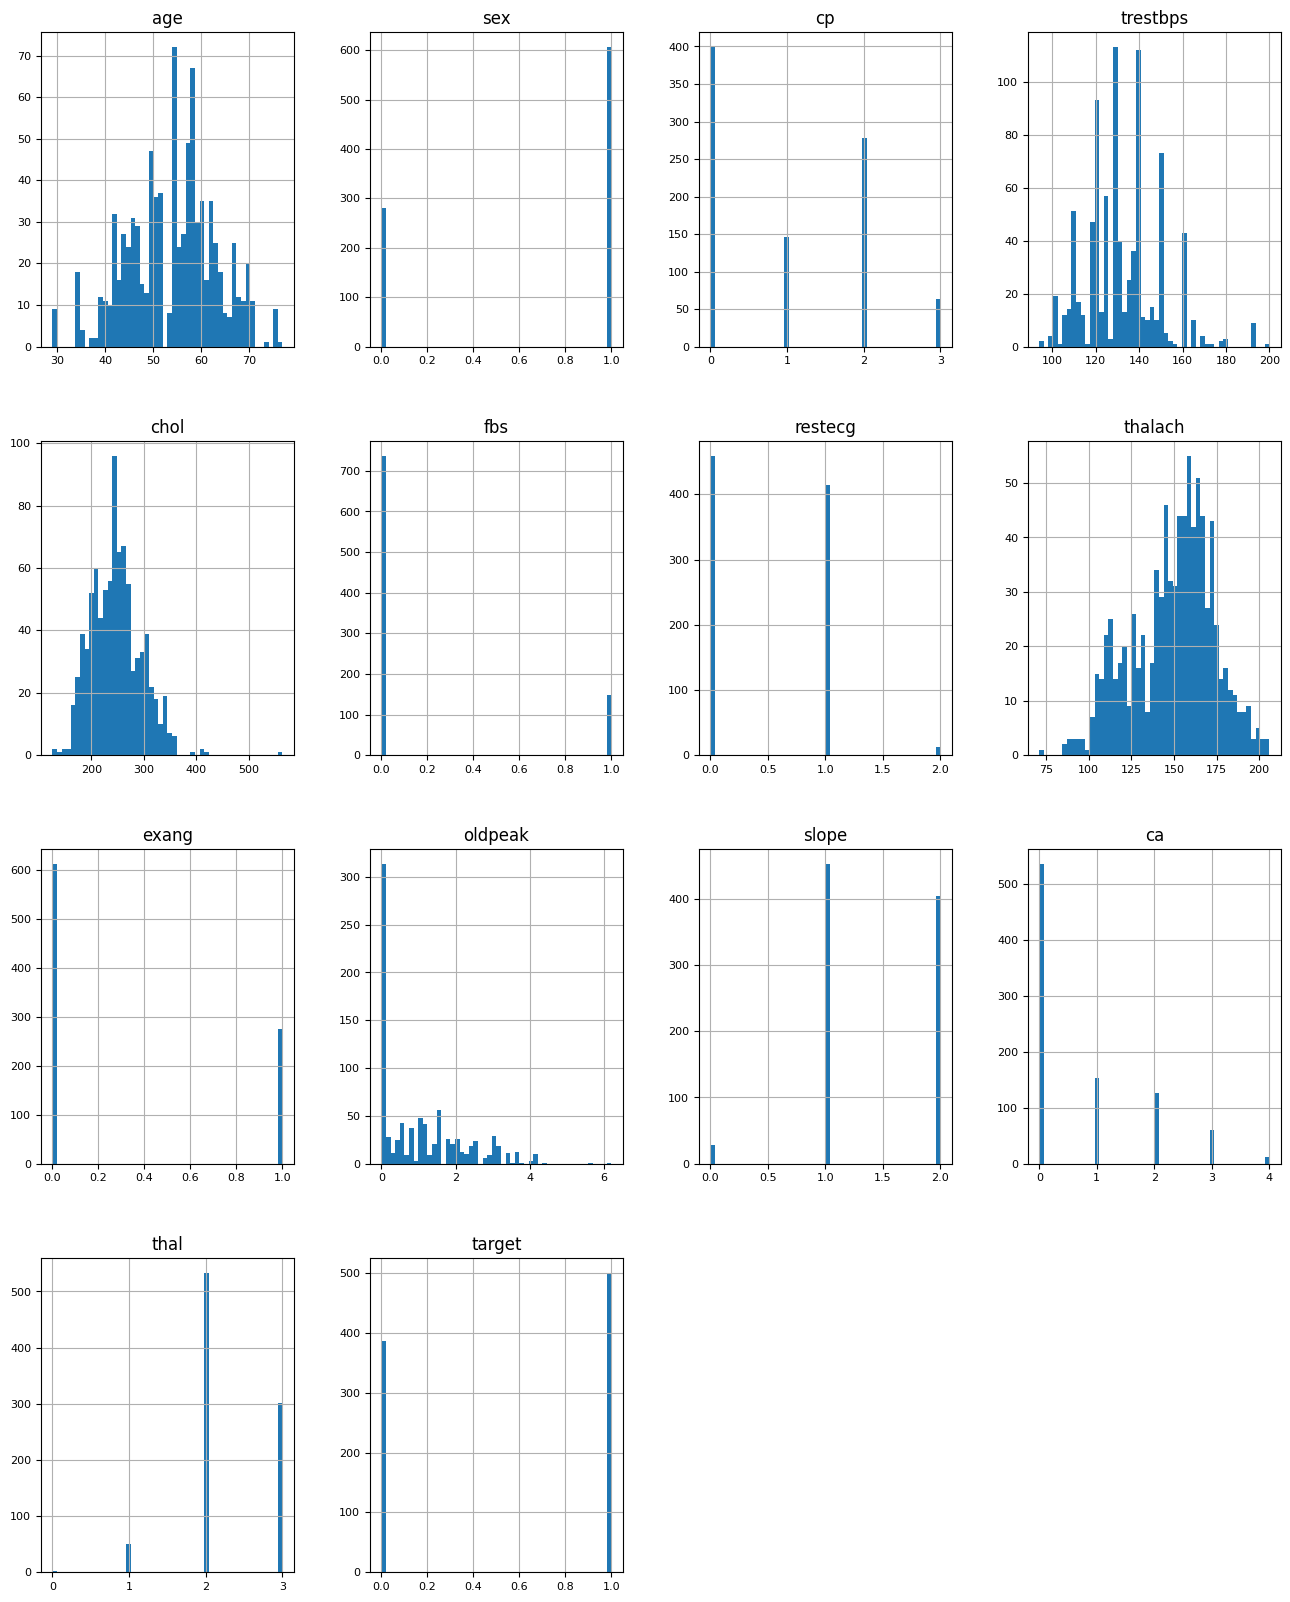

In [106]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

Histogram của các biến định lượng với được gán nhãn theo `target` vẽ đường kde thể hiện phân phối dữ liệu

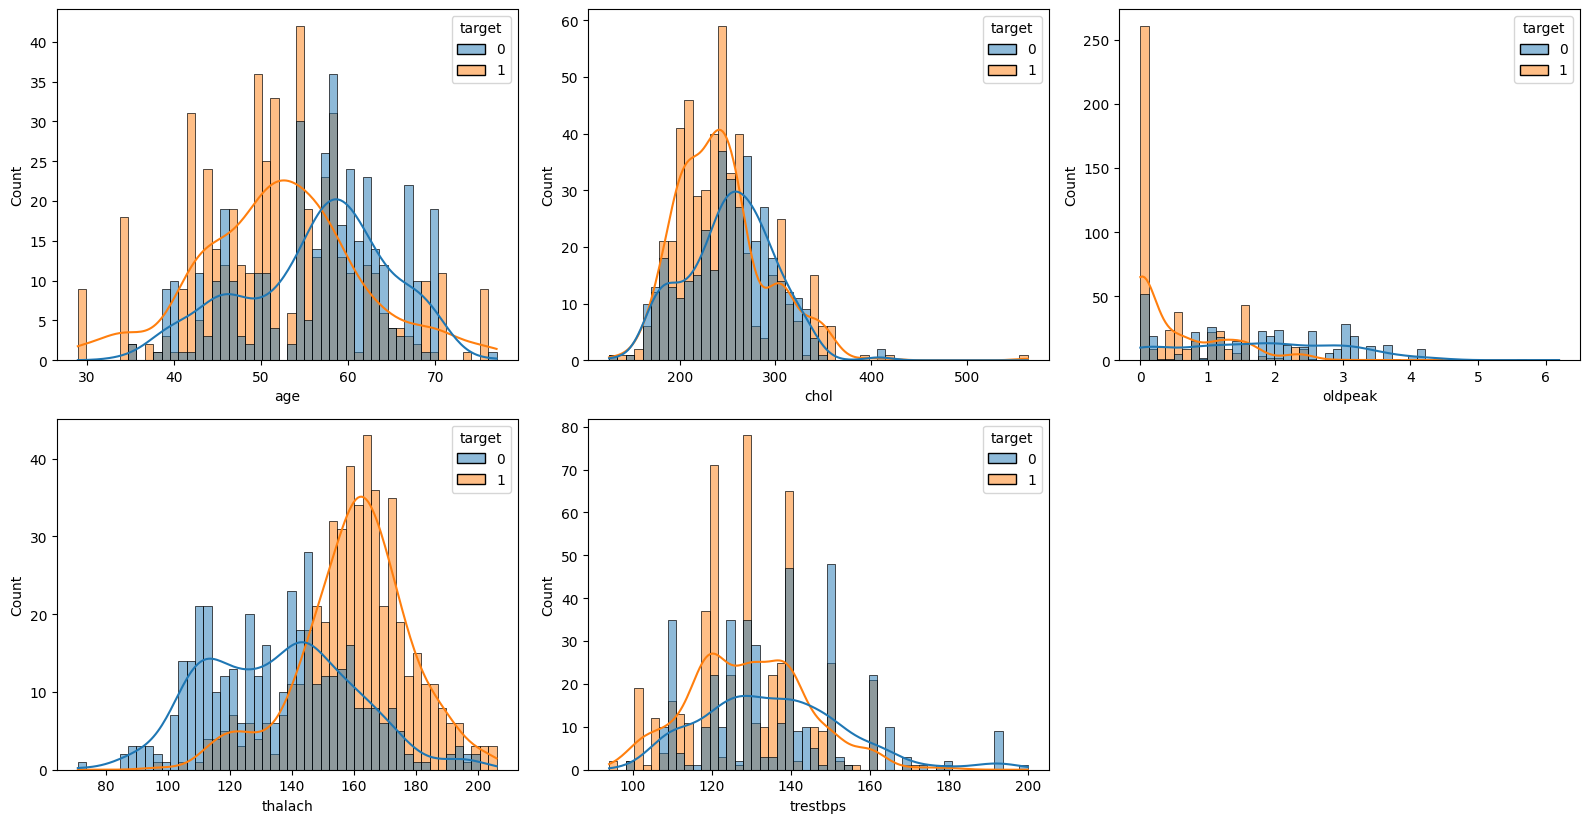

In [108]:
plt.figure(figsize=(16, 12))

for i in range(5):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=quanitative_columns[i], hue='target', kde=True, bins=50)

plt.tight_layout()
plt.show()


cột `age` và `chol` gần giống phân phối chuẩn

Vẽ barplot giữa các cột định tính và cột `target`

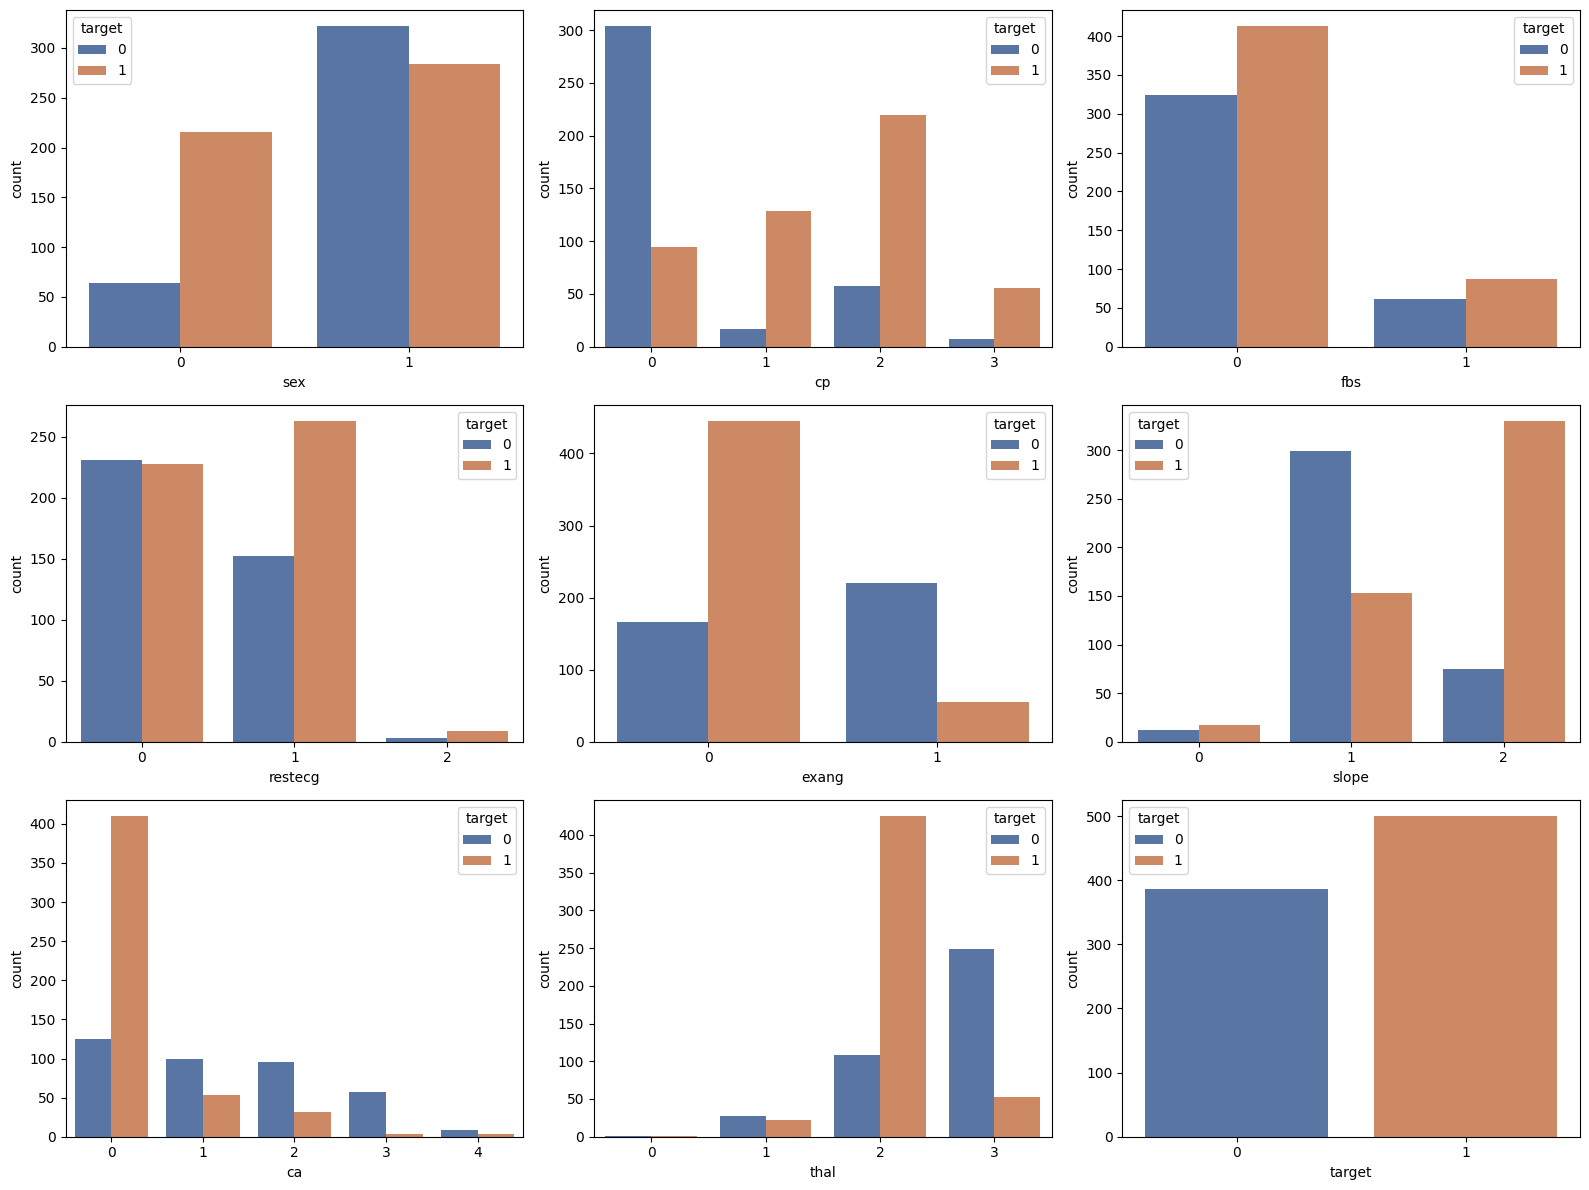

In [109]:
plt.figure(figsize=(16, 12))

for i in range(len(qualitative_columns)):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=qualitative_columns[i], hue='target', palette='deep')

plt.tight_layout()
plt.show()


Vẽ boxplot kiểm tra outliers

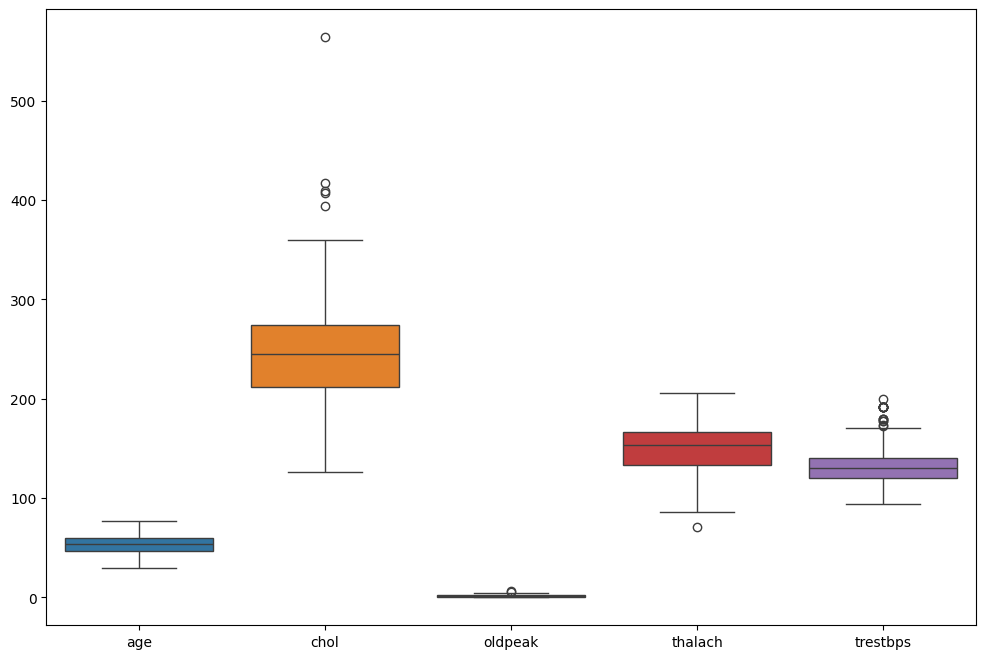

In [110]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df[quanitative_columns])

plt.show()


Nhận thấy có outliers ta sẽ xử lý nó ở bước sau

Ma trận hệ số tương quan

<Axes: >

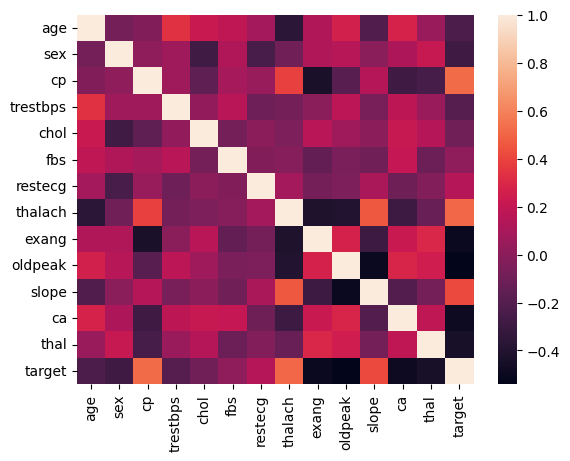

In [111]:
sns.heatmap(df.corr())

## Preprocessing

Kiếm tra missing value

In [112]:
df.isnull().sum()/len(df) * 100

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

Bộ dữ liệu không có missing value

In [113]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Vì missing data = 0 nên không phải xử lý
    
    # Xử lý outliers của các biến định lượng
    for column in quanitative_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

df = preprocessing_data(df)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
1,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
2,71,0,1,160,303,0,1,163,0,0.4,2,2,2,1
3,71,0,1,160,304,0,1,164,0,0.4,2,2,2,1
4,71,0,1,160,305,0,1,165,0,0.4,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
882,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
883,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
884,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


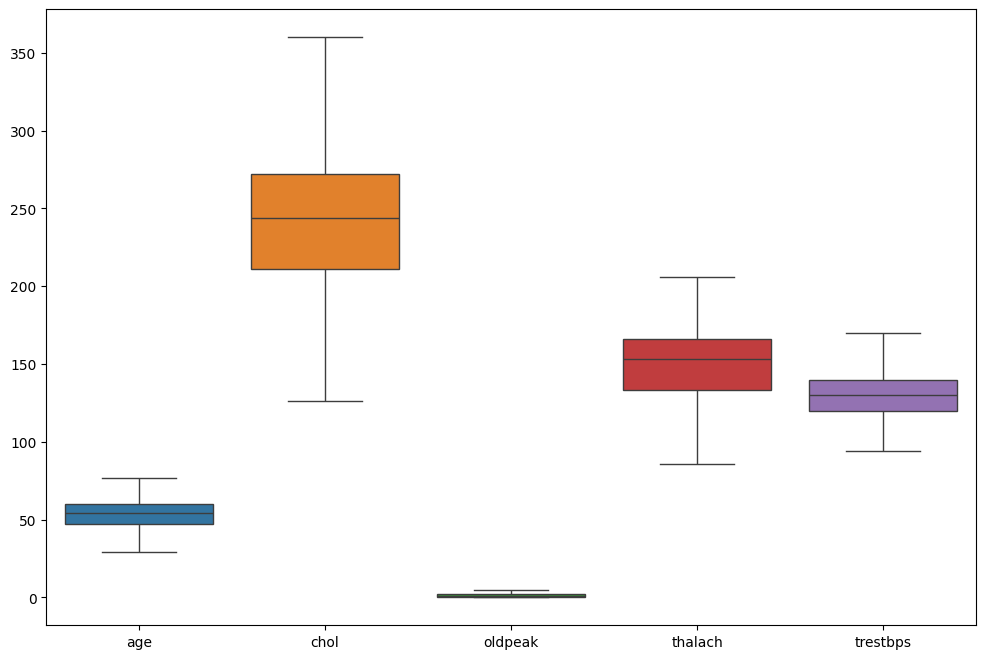

In [114]:
# Test lại sau khi khử outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[quanitative_columns])
plt.show()

Không còn outliers

## Feature Engineering

Tiến hành chuẩn hoá các cột định lượng

<Axes: >

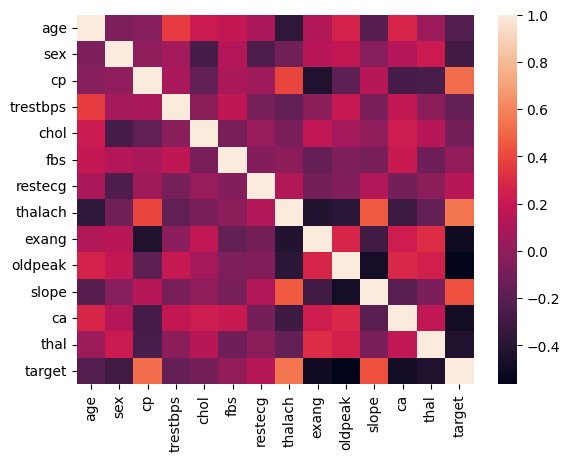

In [115]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Normalize your data
    scaler = StandardScaler()
    df[quanitative_columns] = scaler.fit_transform(df[quanitative_columns])
    
    return df

df = apply_feature_engineering(df.copy())
sns.heatmap(df.corr()) # Show heatmap after normalized data

Tách X,y

In [116]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    X = df.drop(['target'], axis = 1)
    y = df['target']
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [117]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2024
TRAIN_SIZE = 0.8

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

Import thư viện

In [118]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


Evaluate

In [119]:

def calculate_performance(y_true, y_pred):
    """
    Calculate performance metrics such as accuracy, precision, recall, F1-score, confusion matrix, and classification report
    :param y_true: Ground truth values
    :param y_pred: Predictions
    :return: F1-score
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Confusion matrix:\n", confusion)
    print("Classification report:\n", report)
    main_score = f1
    return main_score


### Build model

#### Model 1

In [120]:
def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    model = make_pipeline(LogisticRegression())

    model.fit(X, y)

    return model

In [121]:
#Buil model
model = build_model(trainX, trainY)

# Save predictions
predY = model.predict(testX)

score_md1 = calculate_performance(testY,predY)

Accuracy: 0.9595375722543352
Precision: 0.9716981132075472
Recall: 0.9626168224299065
F1-score: 0.9671361502347418
Confusion matrix:
 [[ 63   3]
 [  4 103]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95        66
           1       0.97      0.96      0.97       107

    accuracy                           0.96       173
   macro avg       0.96      0.96      0.96       173
weighted avg       0.96      0.96      0.96       173



#### Model L1

Ta tiến hành `hyperparamater tuning` với `penalty = L1`

In [123]:
def build_model_l1(X, y):
    param_grid = {
        'logisticregression__penalty': ['l1'],
        'logisticregression__C': np.logspace(-2, 0, 10),
        'logisticregression__solver': ['liblinear', 'saga'],
        'logisticregression__random_state': [RANDOM_STATE],
        'logisticregression__class_weight': [None, 'balanced'],
        'logisticregression__max_iter': [100,500,1000,10000,20000]
    }
    clf = GridSearchCV(make_pipeline(LogisticRegression()), param_grid=param_grid, cv=50, verbose=True, n_jobs=-1,scoring='f1',return_train_score=True)
    best_clf = clf.fit(X, y)
    
    return best_clf


In [124]:
#Buil model
model = build_model_l1(trainX, trainY)

# Save predictions
predY = model.predict(testX)

score_md2 = calculate_performance(testY,predY)

Fitting 50 folds for each of 200 candidates, totalling 10000 fits


Accuracy: 0.9479768786127167
Precision: 0.9537037037037037
Recall: 0.9626168224299065
F1-score: 0.958139534883721
Confusion matrix:
 [[ 61   5]
 [  4 103]]
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        66
           1       0.95      0.96      0.96       107

    accuracy                           0.95       173
   macro avg       0.95      0.94      0.94       173
weighted avg       0.95      0.95      0.95       173



In [125]:
model.best_params_

{'logisticregression__C': 0.1291549665014884,
 'logisticregression__class_weight': None,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 2024,
 'logisticregression__solver': 'saga'}

#### Model L2


Ta tiến hành `hyperparamater tuning` với `penalty = L2`

In [126]:
def build_model_l2(X, y):
    param_grid = {
        'logisticregression__penalty': ['l2'],
        'logisticregression__C': np.logspace(-2, 0, 10),
        'logisticregression__solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
        'logisticregression__random_state': [RANDOM_STATE],
        'logisticregression__class_weight': [None, 'balanced'],
        'logisticregression__max_iter': [100,500,1000,10000,20000]
    }
    
    clf = GridSearchCV(make_pipeline(LogisticRegression()), param_grid=param_grid, cv=50, verbose=True, n_jobs=-1,scoring='f1',return_train_score=True)
    best_clf = clf.fit(X, y)
    
    return best_clf


In [127]:
#Buil model
model = build_model_l2(trainX, trainY)

# Save predictions
predY = model.predict(testX)

score_md3 = calculate_performance(testY,predY)

Fitting 50 folds for each of 500 candidates, totalling 25000 fits


Accuracy: 0.9421965317919075
Precision: 0.9532710280373832
Recall: 0.9532710280373832
F1-score: 0.9532710280373832
Confusion matrix:
 [[ 61   5]
 [  5 102]]
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        66
           1       0.95      0.95      0.95       107

    accuracy                           0.94       173
   macro avg       0.94      0.94      0.94       173
weighted avg       0.94      0.94      0.94       173



In [128]:
model.best_params_

{'logisticregression__C': 0.046415888336127774,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__random_state': 2024,
 'logisticregression__solver': 'lbfgs'}

### Conclusion

In [129]:
print("Score model 1:", score_md1)
print("Score model 2:", score_md2)
print("Score model 3:", score_md3)

Score model 1: 0.9671361502347418
Score model 2: 0.958139534883721
Score model 3: 0.9532710280373832


Kết quả cho thấy các model không chênh nhau nhiều với model 1 nhỉnh nhất với tham số mặc định của thư viện

Theo mặc định thư viện sklearn lấy paramater cho LogisticRegression là: `penalty: : L2` và `solver = lbfgs`

In [145]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return """7. 
    Vì số lượng lớp 0 là 66 < số lượng lớp 1 là 107 nên đây là imbalance data
    F1-score là metric chính trong dữ liệu mất cân bằng vì nó cân nhắc cả Precision và Recall. 
    Precision đo lường tỷ lệ dự đoán đúng tích cực so với tổng số dự đoán tích cực,
    trong khi Recall đo lường tỷ lệ dự đoán đúng tích cực so với tổng số thực tế tích cực.
    \n 
    Chọn tham số: `penalty: : L2` và `solver = lbfgs` """

print(get_conclusion())


7. 
    Vì số lượng lớp 0 là 66 < số lượng lớp 1 là 107 nên đây là imbalance data
    F1-score là metric chính trong dữ liệu mất cân bằng vì nó cân nhắc cả Precision và Recall. 
    Precision đo lường tỷ lệ dự đoán đúng tích cực so với tổng số dự đoán tích cực,
    trong khi Recall đo lường tỷ lệ dự đoán đúng tích cực so với tổng số thực tế tích cực.
    
 
    Chọn tham số: `penalty: : L2` và `solver = lbfgs` 
